In [65]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import models, layers
from keras.optimizers import SGD
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import argparse

# Loading Data from Disk

In [66]:
print("[INFO] loading MNIST full dataset...")
dataset = loadmat("C:/Users/Tajr\Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Datasets/mnist/mnist")

[INFO] loading MNIST full dataset...


In [67]:
dataset

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [68]:
data = dataset['data'].astype("float") / 255.0
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
data = data.T

In [70]:
data.shape

(70000, 784)

In [71]:
targets = dataset['label']
targets

array([[0., 0., 0., ..., 9., 9., 9.]])

In [72]:
targets = targets.T

In [73]:
targets.shape

(70000, 1)

In [74]:
#  Train and test data splitting
(trainX, testX, trainY, testY) = train_test_split(data, targets, test_size=0.25)
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
trainX.shape

(52500, 784)

In [76]:
trainY.shape

(52500, 1)

In [77]:
testX.shape

(17500, 784)

In [78]:
testY.shape

(17500, 1)

In [79]:
testY

array([[6.],
       [0.],
       [1.],
       ...,
       [6.],
       [0.],
       [6.]])

In [80]:
# Converting labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)
testY[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# Network definition

In [81]:

model = models.Sequential()
model.add(layers.Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

# Compilation and Training

In [82]:
sgd = SGD(0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 2s 40us/step - loss: 2.2751 - acc: 0.1917 - val_loss: 2.2441 - val_acc: 0.1805
Epoch 2/100
52500/52500 [==============================] - 2s 36us/step - loss: 2.2143 - acc: 0.3593 - val_loss: 2.1816 - val_acc: 0.3992
Epoch 3/100
52500/52500 [==============================] - 2s 37us/step - loss: 2.1417 - acc: 0.4749 - val_loss: 2.0969 - val_acc: 0.4691
Epoch 4/100
52500/52500 [==============================] - 2s 41us/step - loss: 2.0413 - acc: 0.5525 - val_loss: 1.9780 - val_acc: 0.6310
Epoch 5/100
52500/52500 [==============================] - 2s 40us/step - loss: 1.9032 - acc: 0.6065 - val_loss: 1.8195 - val_acc: 0.6596
Epoch 6/100
52500/52500 [==============================] - 2s 42us/step - loss: 1.7286 - acc: 0.6514 - val_loss: 1.6328 - val_acc: 0.6788
Epoch 7/100
52500/52500 [==============================] - 2s 41us/step - loss: 1.5390 - acc: 0.6898 - val_loss: 1.4453 - 

52500/52500 [==============================] - 2s 41us/step - loss: 0.3235 - acc: 0.9073 - val_loss: 0.3311 - val_acc: 0.9050
Epoch 60/100
52500/52500 [==============================] - 2s 38us/step - loss: 0.3217 - acc: 0.9079 - val_loss: 0.3297 - val_acc: 0.9046
Epoch 61/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.3200 - acc: 0.9084 - val_loss: 0.3280 - val_acc: 0.9062
Epoch 62/100
52500/52500 [==============================] - 2s 41us/step - loss: 0.3182 - acc: 0.9086 - val_loss: 0.3265 - val_acc: 0.9055
Epoch 63/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.3167 - acc: 0.9094 - val_loss: 0.3247 - val_acc: 0.9064
Epoch 64/100
52500/52500 [==============================] - 2s 42us/step - loss: 0.3151 - acc: 0.9102 - val_loss: 0.3231 - val_acc: 0.9067
Epoch 65/100
52500/52500 [==============================] - 2s 40us/step - loss: 0.3135 - acc: 0.9102 - val_loss: 0.3219 - val_acc: 0.9073
Epoch 66/100
52500/52500 [==============

# Presenting results

In [83]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

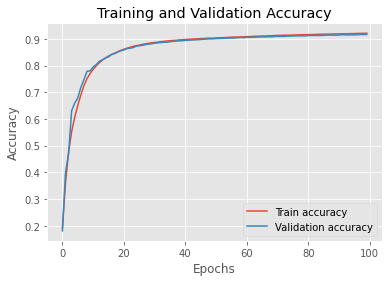

In [90]:
epochs = np.arange(0, 100)

accuracy = history_dict['acc']
loss = history_dict['loss']

val_accuracy = history_dict['val_acc']
validation_loss = history_dict['val_loss']

plt.style.use('ggplot')
plt.plot(epochs, accuracy, label="Train accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")

plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

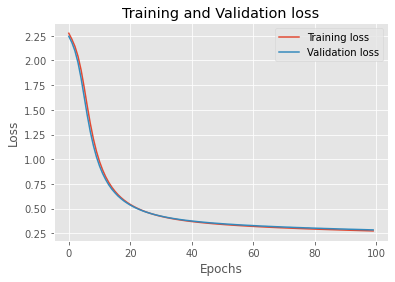

In [86]:
plt.clf()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, validation_loss, label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Model Evaluation

In [87]:
#Note: a call to predict method will return the class label probabilities for every datapoint in the testX
# To determine the class with the largest probability we can simply call argmax(axis=1)
# The argmax method will give us the final output classification by the network in tabulated format


predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1729
         1.0       0.95      0.97      0.96      1973
         2.0       0.91      0.89      0.90      1721
         3.0       0.90      0.88      0.89      1772
         4.0       0.90      0.93      0.92      1743
         5.0       0.88      0.86      0.87      1555
         6.0       0.93      0.95      0.94      1734
         7.0       0.94      0.92      0.93      1806
         8.0       0.89      0.88      0.88      1693
         9.0       0.90      0.90      0.90      1774

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



From the graphs above notice how training and validation curves are near identical, implying that there is no overfitting occuring